Big Data Project

In [ ]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.6 MB/s eta 0:00:00


In [ ]:

from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
import torch
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU: {gpu_name}")
else:
    print("No GPU found.")


GPU: Tesla T4


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# Install the appropriate version of torch
!pip install torch torchvision torchaudio --upgrade --extra-index-url https://download.pytorch.org/whl/cu11x


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu11x
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [ ]:

class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [1]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

NameError: name 'StableDiffusionPipeline' is not defined

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


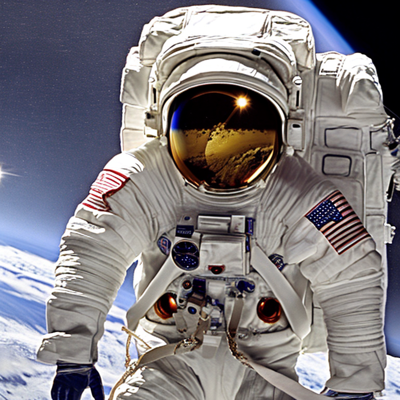

In [ ]:

generate_image("astronaut in space", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

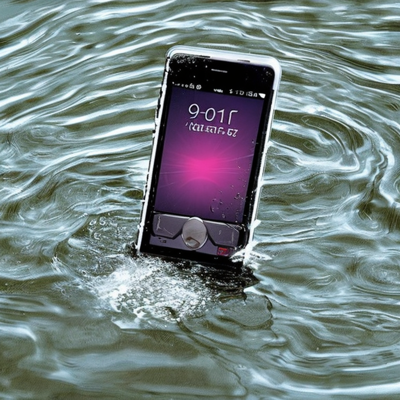

In [ ]:

generate_image("phone in water", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

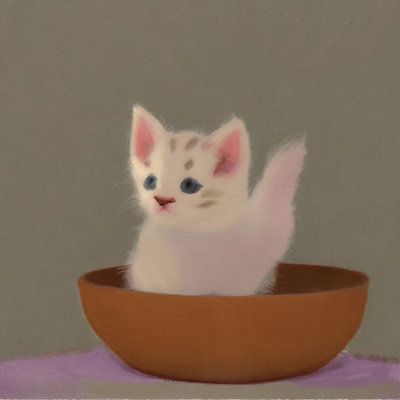

In [ ]:

generate_image("kitten in a bowl", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

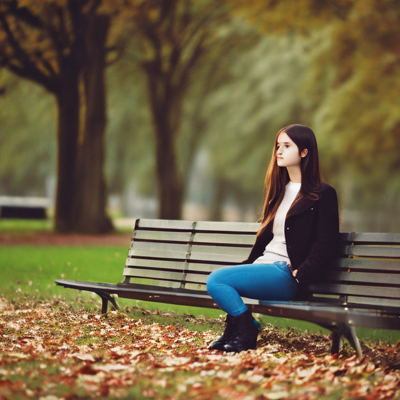

In [ ]:
generate_image("girl waiting for her boyfriend in a park", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

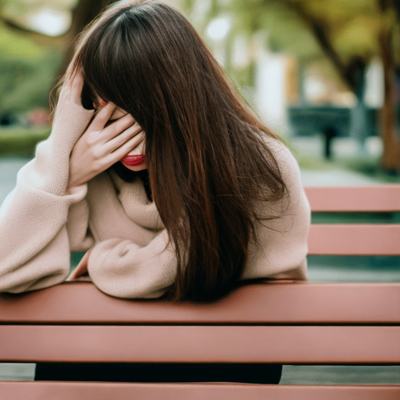

In [ ]:
generate_image("Woman with her lips closed, stressed out, sitting on a park bench", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

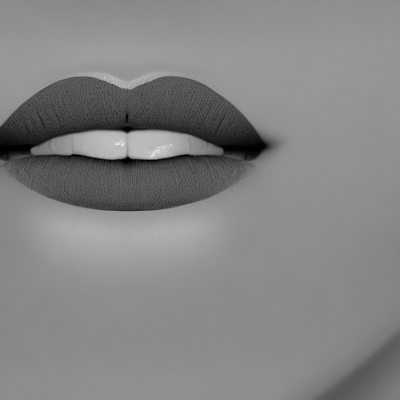

In [ ]:
generate_image("Smirking woman, sitting on a park bench", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

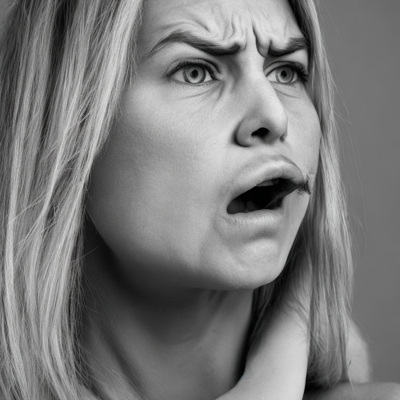

In [ ]:
generate_image(" woman biting her lips, angrily", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

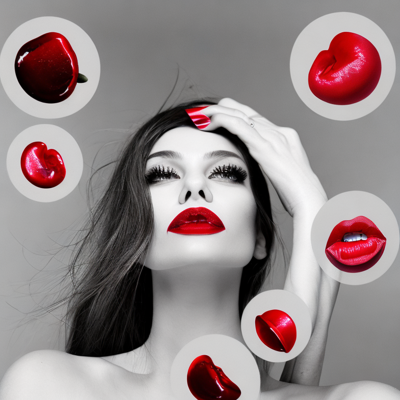

In [ ]:
generate_image("beautiful women with cherry red lipstick", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

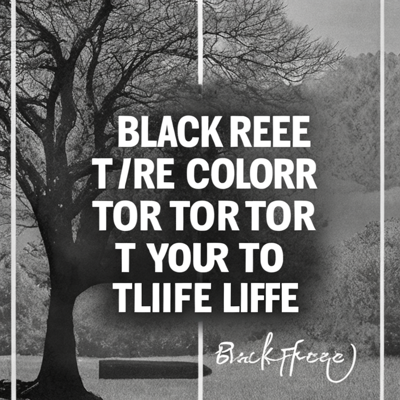

In [ ]:
generate_image("black tree with 'Revlon add color to your life' as title", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

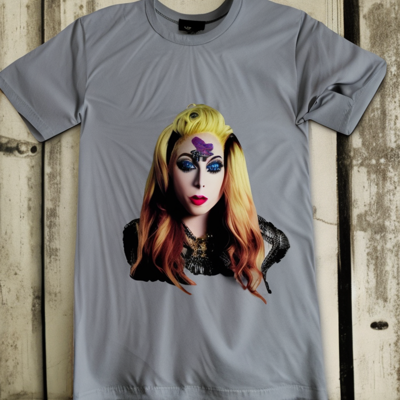

In [ ]:
generate_image("Tshirt with lady gaga face", image_gen_model)

In [ ]:
aa = generate_image("'hearts", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

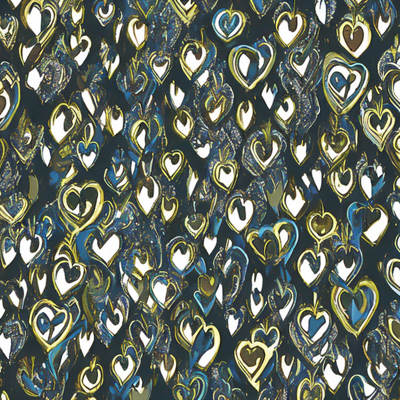

In [ ]:
aa

In [ ]:
from PIL import Image

# Replace `generated_image` with the variable storing your image
#aa.save('/content/white_crop_top_gold_star.png')
